In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import gradio as gr

In [ ]:
# Load and prepare data
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # 1 for Setosa, 0 for others
feature_names = iris.feature_names

In [ ]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Normal ANN (SGD Backpropagation with default params)
clf_normal = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                           solver='sgd', max_iter=1000, random_state=42)
clf_normal.fit(X_train_scaled, y_train)
y_pred_normal = clf_normal.predict(X_test_scaled)
acc_normal = accuracy_score(y_test, y_pred_normal)
print(f"Accuracy - Normal SGD: {acc_normal:.4f}")

Accuracy - Normal SGD: 0.9667


In [ ]:
# 2. ANN with Adam optimizer
clf_adam = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                        solver='adam', max_iter=1000, random_state=42)
clf_adam.fit(X_train_scaled, y_train)
y_pred_adam = clf_adam.predict(X_test_scaled)
acc_adam = accuracy_score(y_test, y_pred_adam)
print(f"Accuracy - Adam: {acc_adam:.4f}")

Accuracy - Adam: 0.9667


In [ ]:
# 3. ANN with Tweaked SGD (momentum and adaptive learning rate)
# Tweaks: added momentum=0.9 and learning_rate='adaptive' compared to Normal SGD
clf_sgd_tweaked = MLPClassifier(hidden_layer_sizes=(10,), activation='relu',
                                 solver='sgd', learning_rate='adaptive', momentum=0.9,
                                 learning_rate_init=0.01, max_iter=1000, random_state=42)
clf_sgd_tweaked.fit(X_train_scaled, y_train)
y_pred_sgd_tweaked = clf_sgd_tweaked.predict(X_test_scaled)
acc_sgd_tweaked = accuracy_score(y_test, y_pred_sgd_tweaked)
print(f"Accuracy - Tweaked SGD: {acc_sgd_tweaked:.4f}")

Accuracy - Tweaked SGD: 1.0000


In [ ]:
# 4. Summarize Accuracies
accuracies = pd.DataFrame({
    'Model': ['Normal SGD', 'Adam', 'Tweaked SGD'],
    'Accuracy': [acc_normal, acc_adam, acc_sgd_tweaked]
})
print(accuracies)

         Model  Accuracy
0   Normal SGD  0.966667
1         Adam  0.966667
2  Tweaked SGD  1.000000


In [ ]:
# 5. Classification Reports and Confusion Matrices
models = {
    'Normal SGD': (clf_normal, y_pred_normal),
    'Adam': (clf_adam, y_pred_adam),
    'Tweaked SGD': (clf_sgd_tweaked, y_pred_sgd_tweaked)
}
for name, (model, y_pred) in models.items():
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Normal SGD ---
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[20  0]
 [ 1  9]]

--- Adam ---
Accuracy: 0.9667
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[20  0]
 [ 1  9]]

--- Tweaked SGD ---
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00    

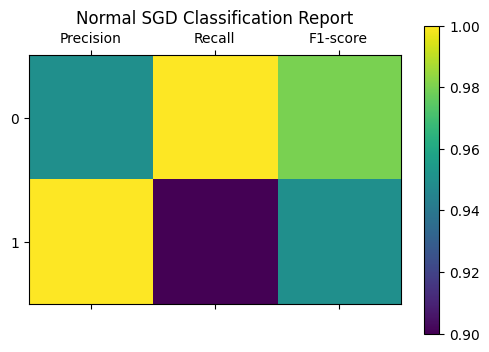

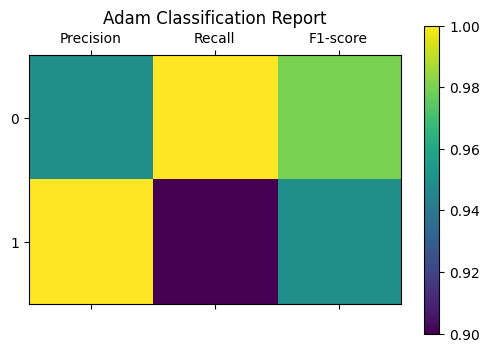

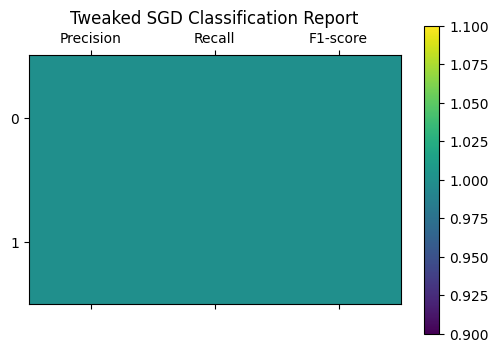

In [ ]:
# 6. Visualization of Classification Reports
def plot_classification_report(cr, title='Classification Report'):
    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2:4]:  # two classes
        t = line.strip().split()
        if len(t) >= 4:
            classes.append(t[0])
            plotMat.append([float(x) for x in t[1:4]])
    plotMat = np.array(plotMat)
    fig, ax = plt.subplots(figsize=(6,4))
    cax = ax.matshow(plotMat)
    fig.colorbar(cax)
    ax.set_xticks(range(3))
    ax.set_xticklabels(['Precision','Recall','F1-score'])
    ax.set_yticks(range(len(classes)))
    ax.set_yticklabels(classes)
    plt.title(title)
    plt.show()

for name, (_, y_pred) in models.items():
    cr = classification_report(y_test, y_pred)
    plot_classification_report(cr, title=f"{name} Classification Report")

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('liverpatientdataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'liverpatientdataset.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

An unexpected error occurred: 'utf-8' codec can't decode byte 0xa0 in position 74: invalid start byte


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('liverpatientdataset.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'liverpatientdataset.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


(30691, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

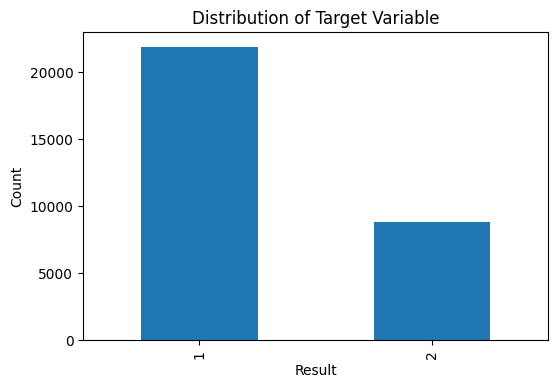

ValueError: could not convert string to float: 'Female'

In [ ]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

# Descriptive statistics for numerical features
print(df.describe())

# Analyze target variable distribution
print(df['Result'].value_counts())
import matplotlib.pyplot as plt
df['Result'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Distribution of Target Variable')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

# Examine correlation between numerical features and target variable
correlation_matrix = df.corr()
print(correlation_matrix['Result'])
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Check unique values in categorical columns
print(df['Gender of the patient'].value_counts())

Age of the patient                     -0.004759
Total Bilirubin                        -0.222448
Direct Bilirubin                       -0.247078
 Alkphos Alkaline Phosphotase          -0.180928
 Sgpt Alamine Aminotransferase         -0.164298
Sgot Aspartate Aminotransferase        -0.157445
Total Protiens                          0.030140
 ALB Albumin                            0.159068
A/G Ratio Albumin and Globulin Ratio    0.156742
Result                                  1.000000
Name: Result, dtype: float64


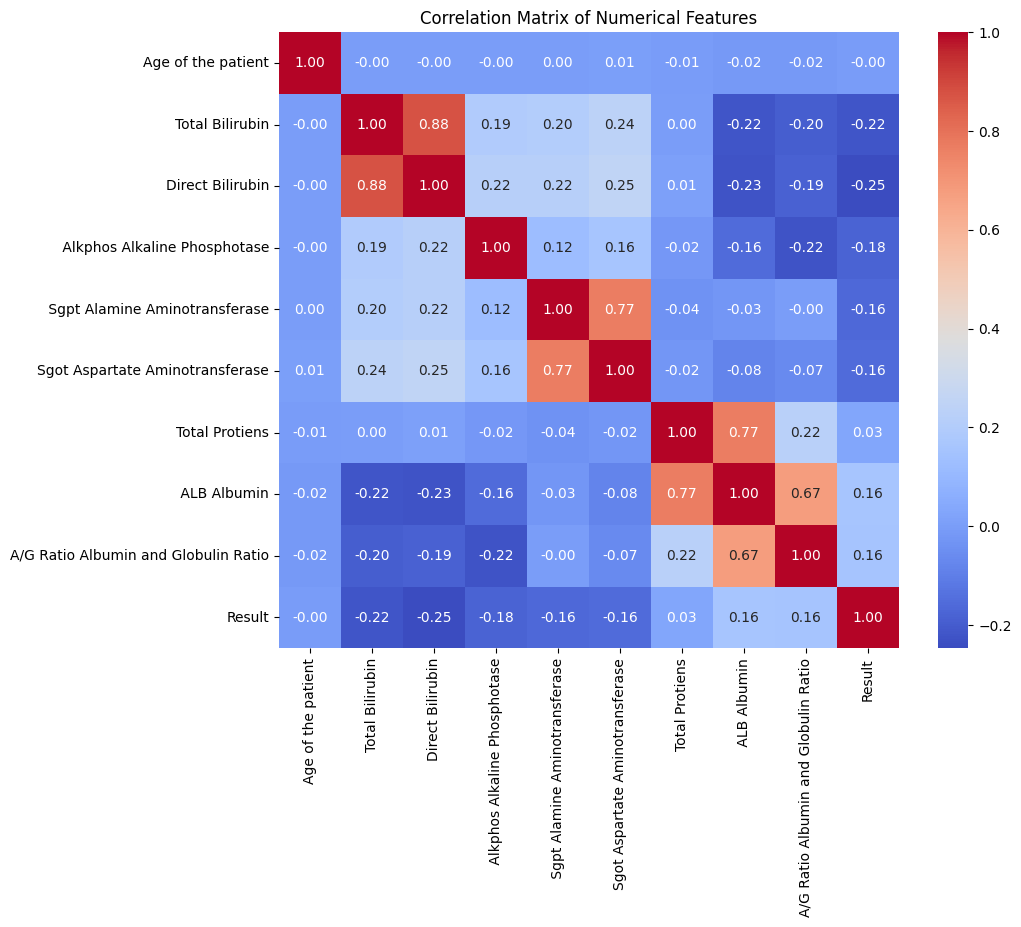

In [ ]:
# Select numerical columns and handle missing values
numerical_cols = df.select_dtypes(include=['number'])
numerical_cols = numerical_cols.fillna(numerical_cols.mean())

# Recalculate the correlation matrix
correlation_matrix = numerical_cols.corr()
print(correlation_matrix['Result'])

plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Missing Value Imputation
for col in df.columns:
    if df[col].dtype == 'object':
        # Impute categorical features with the most frequent value
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype in ['int64', 'float64']:
        # Impute numerical features with the median (robust to outliers)
        df[col] = df[col].fillna(df[col].median())

# Outlier Handling (using Winsorization for numerical features)
for col in df.select_dtypes(include=['number']):
    if col != 'Result':  # Exclude the target variable
        df[col] = df[col].clip(lower=df[col].quantile(0.05), upper=df[col].quantile(0.95))

# Data Type Conversion (ensure numerical columns are numeric)
for col in df.select_dtypes(include=['number']):
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Duplicate Removal
df.drop_duplicates(inplace=True)

display(df.head())
display(df.info())

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,690.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,15.0,20.0,6.8,3.4,1.00,1
4,70.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.50,1


<class 'pandas.core.frame.DataFrame'>
Index: 18187 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    18187 non-null  float64
 1   Gender of the patient                 18187 non-null  object 
 2   Total Bilirubin                       18187 non-null  float64
 3   Direct Bilirubin                      18187 non-null  float64
 4    Alkphos Alkaline Phosphotase         18187 non-null  float64
 5    Sgpt Alamine Aminotransferase        18187 non-null  float64
 6   Sgot Aspartate Aminotransferase       18187 non-null  float64
 7   Total Protiens                        18187 non-null  float64
 8    ALB Albumin                          18187 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  18187 non-null  float64
 10  Result                                18187 non-null  int64  
dtypes: float64(9), int64

None

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# One-hot encode 'Gender of the patient'
df_encoded = pd.get_dummies(df, columns=['Gender of the patient'], drop_first=True)

# Identify numerical features
numerical_cols = df_encoded.select_dtypes(include=['number'])
numerical_cols = numerical_cols.drop('Result', axis=1)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_cols)
df_encoded[numerical_cols.columns] = scaled_data

display(df_encoded.head())

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Male
0,1.453449,-0.516659,-0.556434,-0.545401,-0.731424,-0.645055,0.306731,0.229809,-0.137922,1,False
1,1.248280,1.950440,1.904092,2.905751,0.131764,0.183328,1.027789,0.091975,-0.728070,1,True
2,1.248280,1.079699,1.266178,1.533523,0.059832,-0.139943,0.512748,0.229809,-0.174806,1,True
3,0.974720,-0.444097,-0.419738,-0.579707,-0.749407,-0.624851,0.306731,0.367643,0.230920,1,True
4,1.795399,0.257333,0.309306,-0.490512,-0.533610,-0.230863,0.821773,-1.010697,-1.613292,1,True


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop('Result', axis=1)
y = df_encoded['Result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='f1',
    cv=5,
    random_state=42,
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Access the best estimator
best_rf_classifier = random_search.best_estimator_

Best hyperparameters: {'max_depth': 44, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
Best score: 0.9967704628702474


Accuracy: 0.9964
Precision: 0.9954
Recall: 0.9996
F1-score: 0.9975
AUC-ROC: 0.9999

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2589
           2       1.00      0.99      0.99      1049

    accuracy                           1.00      3638
   macro avg       1.00      0.99      1.00      3638
weighted avg       1.00      1.00      1.00      3638



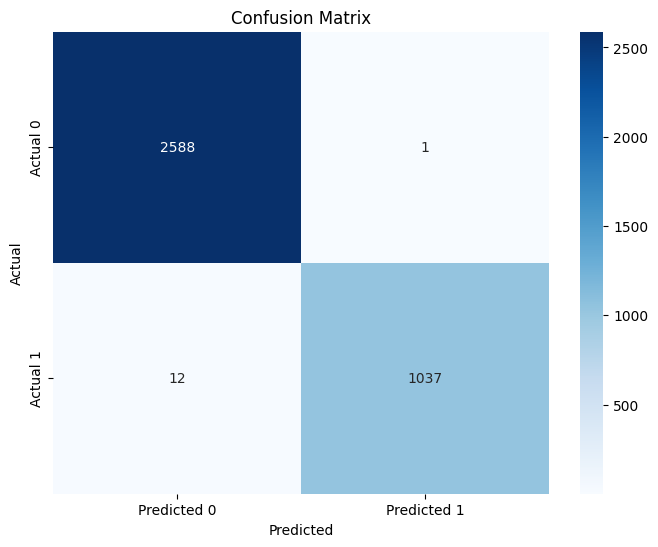

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Predict probabilities for AUC-ROC
y_pred_proba = best_rf_classifier.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()